# Gradient Descent 1d


### Numerics

Numerical optimization refers to the process of finding the minimum (or maximum) of a
function using computational algorithms

Unlike analytical methods that seek to solve
problems using algebraic expressions, **numerical methods approximate solutions
iteratively**.

Key Concepts:

- **Objective Function**: The function we aim to minimize or maximize
- **Gradient**: The vector of partial derivatives of the objective function. It points in the direction of the steepest ascent
- **Learning Rate**: A hyperparameter that determines the step size during each iteration


### Implementation

##### Create test function

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


def make_test_func(deg):
    if deg == 2:
        coeff = np.polyfit([1, 3.5, 6], [10, 0, 10], 2)
    elif deg == 5:
        coeff = np.polyfit([1, 2, 3, 4, 5, 6], [2, 8, 4, 10, 3, 5], 5)
    else:
        raise ValueError("degree not supported")

    f_obj = partial(np.polyval, coeff)
    f_grad = partial(np.polyval, np.polyder(coeff))

    return f_obj, f_grad

##### Run gradient descent

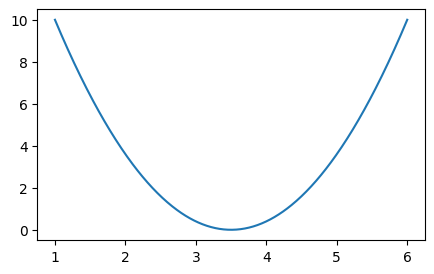

In [74]:
f_obj, f_grad = make_test_func(2)


plt.figure(figsize=(5, 3))
x_values = np.linspace(1, 6, 500)
y_values = f_obj(x_values)
plt.plot(x_values, y_values, label="Objective Function")

Minimum found at x = 3.4999999999999893


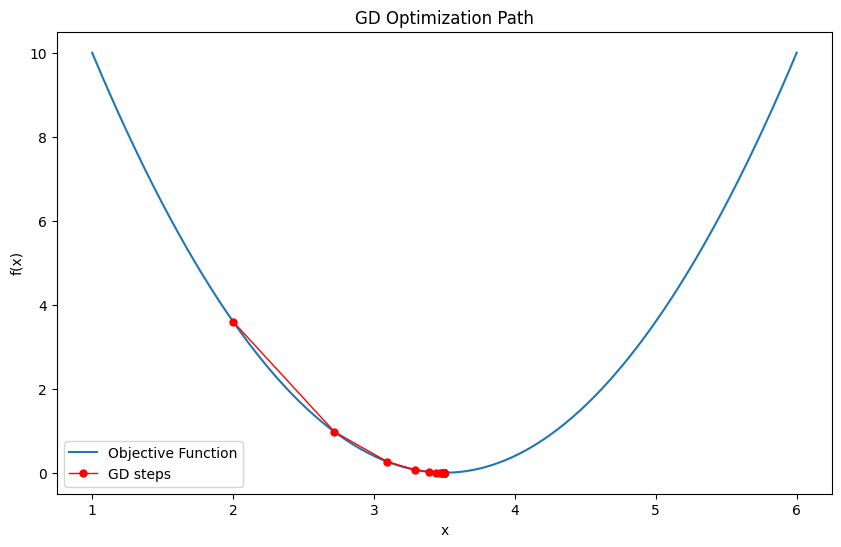

In [75]:
def run_gradient_descent(gradient_func, gamma=0.1, nit=100, x0=0):
    x = x0
    x_history = [x]
    for _ in range(nit):
        grad = gradient_func(x)
        x = x - gamma * grad
        x_history.append(x)
    return x, x_history


final_x, x_history = run_gradient_descent(f_grad, gamma=0.15, nit=50, x0=2)
print(f"Minimum found at x = {final_x}")

plt.figure(figsize=(10, 6))
x_values = np.linspace(1, 6, 500)
y_values = f_obj(x_values)
plt.plot(x_values, y_values, label="Objective Function")
plt.plot(
    x_history,
    f_obj(np.array(x_history)),
    color="red",
    lw=1,
    marker=".",
    ms=10,
    label="GD steps",
)

plt.title("GD Optimization Path")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [76]:
import numpy as np

# Define Himmelblau's function
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Define the gradient of Himmelblau's function
def gradient(x, y):
    grad_x = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
    grad_y = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
    return np.array([grad_x, grad_y])

# Gradient descent parameters
alpha = 0.01  # Learning rate
tolerance = 1e-6
max_iterations = 10000

# Initial guess
x0, y0 = 0, 0  # This can be changed to start from different points

# Gradient descent loop
for i in range(max_iterations):
    grad = gradient(x0, y0)
    new_x = x0 - alpha * grad[0]
    new_y = y0 - alpha * grad[1]

    # Check for convergence
    if np.linalg.norm([new_x - x0, new_y - y0]) < tolerance:
        print(f"Converged in {i} iterations.")
        break

    x0, y0 = new_x, new_y
else:
    print("Max iterations reached without convergence.")

print(f"Minimum at ({x0}, {y0}) with value {himmelblau(x0, y0)}")

Converged in 47 iterations.
Minimum at (2.999998890516369, 2.000002678523072) with value 1.0807613266952475e-10
